In [1]:
#import the libraries such as numpy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
#LAB 9 
# QN-2

In [32]:
df = pd.read_csv("sentiment.csv")
pd.set_option("display.max_columns" ,10)
pd.set_option("display.max_rows" ,100)
df

,ID,Text,Sentiment,Timestamp,User,...,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,15-01-2023 12:30,User123,...,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,Negative,15-01-2023 08:45,CommuterX,...,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪 ...,Positive,15-01-2023 15:45,FitnessFan,...,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,Positive,15-01-2023 18:20,AdventureX,...,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,15-01-2023 19:55,ChefCook,...,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...
727,728,Collaborating on a science project that receiv...,Happy,18-08-2017 18:20,ScienceProjectSuccessHighSchool,...,UK,2017,8,18,18
728,729,Attending a surprise birthday party organized ...,Happy,22-06-2018 14:15,BirthdayPartyJoyHighSchool,...,USA,2018,6,22,14
729,730,Successfully fundraising for a school charity ...,Happy,05-04-2019 17:30,CharityFundraisingTriumphHighSchool,...,Canada,2019,4,5,17
730,731,"Participating in a multicultural festival, cel...",Happy,29-02-2020 20:45,MulticulturalFestivalJoyHighSchool,...,UK,2020,2,29,20


In [33]:
#1 Clean The Sentiment And Text Columns
df['Sentiment'] = df['Sentiment'].str.strip().str.lower()
df['Text'] = df['Text'].str.strip().str.lower()

positive          45
joy               44
excitement        37
contentment       19
neutral           18
                  ..
lostlove           1
emotionalstorm     1
suffering          1
bittersweet        1
intrigue           1
Name: Sentiment, Length: 191, dtype: int64


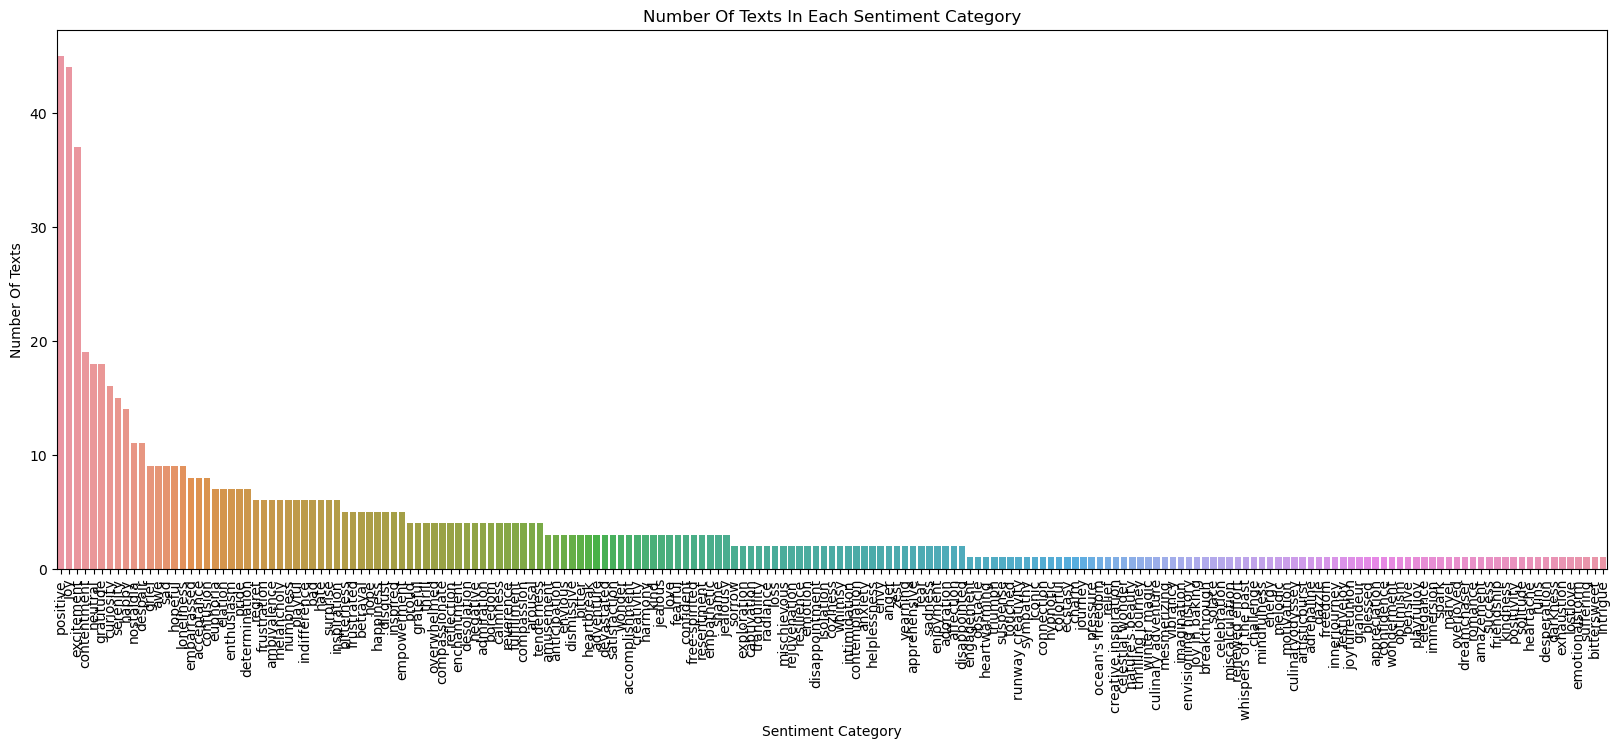

In [35]:
#2
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)
plt.figure(figsize=(20,7))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel("Sentiment Category")
plt.ylabel("Number Of Texts")
plt.title("Number Of Texts In Each Sentiment Category")
plt.xticks(rotation=90)
plt.show()

Sentiment
acceptance         72.500000
accomplishment     83.000000
admiration         77.250000
adoration          48.500000
adrenaline         60.000000
                     ...    
winter magic      155.000000
wonder             79.333333
wonderment         60.000000
yearning          117.000000
zest              107.000000
Name: Text_Length, Length: 191, dtype: float64


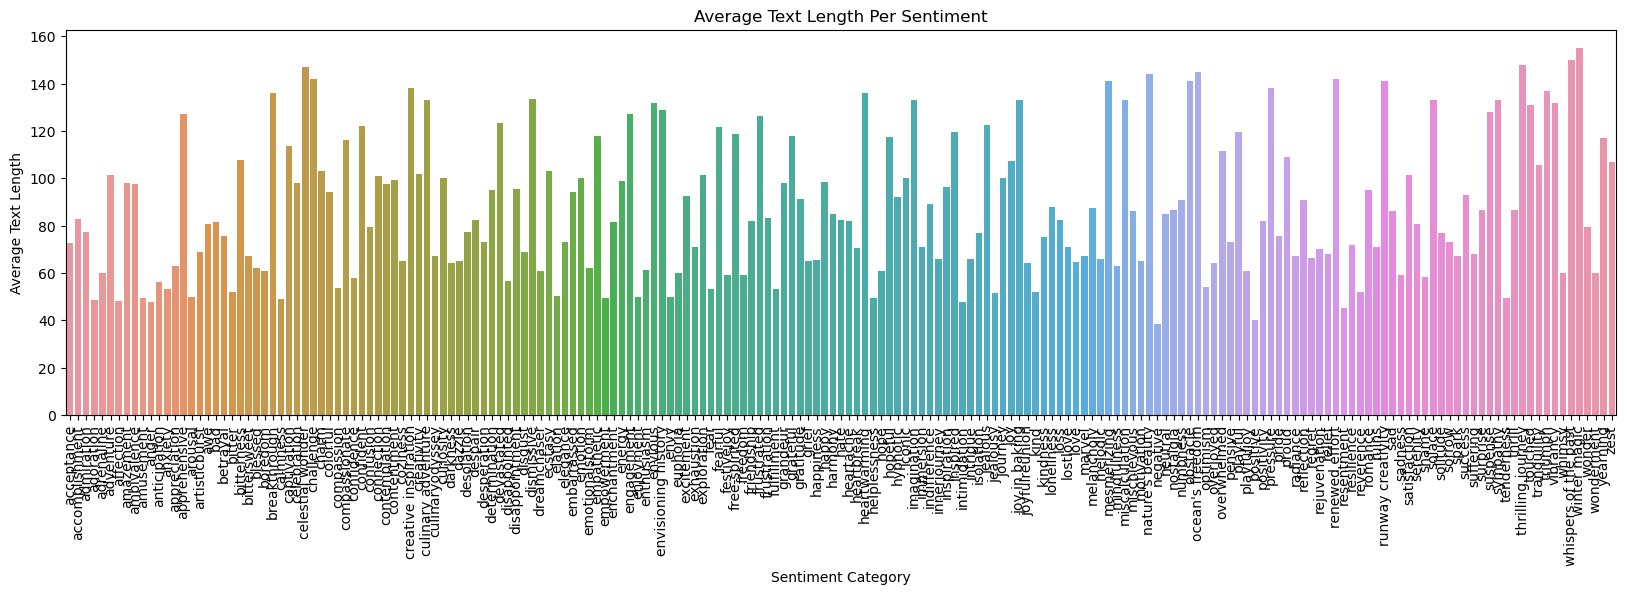

In [36]:
#3
df['Text_Length'] = df['Text'].str.len()
sentiment_length = df.groupby('Sentiment')['Text_Length'].mean()
print(sentiment_length)
plt.figure(figsize=(20,5))
sns.barplot(x=sentiment_length.index, y=sentiment_length.values)
plt.xlabel("Sentiment Category")
plt.ylabel("Average Text Length")
plt.title("Average Text Length Per Sentiment")
plt.xticks(rotation=90)
plt.show()

In [37]:
#4
max_likes = df['Likes'].max()
max_likes_text = df[df['Likes']==max_likes][['Text', 'Likes']]
print(max_likes_text)

                                                  Text  Likes
335  thrilled to witness the grandeur of a cultural...     80
345  motivated to achieve fitness goals after an in...     80
355  anticipation for an upcoming adventure in an e...     80
368  elation over discovering a rare book in a quai...     80
382  a sense of wonder at the vastness of the cosmo...     80
402  awe-inspired by the vastness of the cosmos on ...     80
432  heartache deepens, a solitary journey through ...     80
470  dancing on sunshine, each step a celebration o...     80
481  surrounded by the colors of joy, a canvas pain...     80
510  at the front row of adele's concert, each note...     80
520  at a justin bieber concert, the infectious bea...     80
530  captivated by the spellbinding plot twists, th...     80
540  celebrating a historic victory in the world cu...     80
550  after a series of defeats, the soccer team fac...     80
560  in the serene beauty of a sunset, nature unfol...     80
570  und

In [38]:
#5
max_retweets=df['Retweets'].max()
max_retweet_text=df[df['Retweets']==max_retweets][['Text', 'Sentiment', 'Retweets']]
print(max_retweet_text)

                                                  Text       Sentiment  \
335  thrilled to witness the grandeur of a cultural...          thrill   
345  motivated to achieve fitness goals after an in...      motivation   
355  anticipation for an upcoming adventure in an e...    anticipation   
368  elation over discovering a rare book in a quai...         elation   
382  a sense of wonder at the vastness of the cosmo...          wonder   
402  awe-inspired by the vastness of the cosmos on ...          wonder   
432  heartache deepens, a solitary journey through ...         despair   
470  dancing on sunshine, each step a celebration o...             joy   
481  surrounded by the colors of joy, a canvas pain...             joy   
510  at the front row of adele's concert, each note...         emotion   
520  at a justin bieber concert, the infectious bea...      enthusiasm   
530  captivated by the spellbinding plot twists, th...      excitement   
540  celebrating a historic victory in

 USA          5
 India        5
 UK           4
 Canada       4
USA           4
Name: Country, dtype: int64


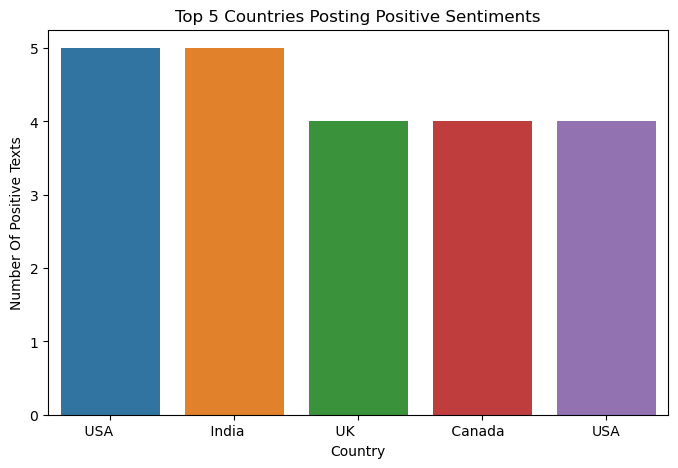

In [39]:
#6
positive_countries = df[df['Sentiment']=='positive']['Country'].value_counts().head(5)
print(positive_countries)
plt.figure(figsize=(8,5))
sns.barplot(x=positive_countries.index, y=positive_countries.values)
plt.xlabel("Country")
plt.ylabel("Number Of Positive Texts")
plt.title("Top 5 Countries Posting Positive Sentiments")
plt.show()

In [40]:
#7
travel_texts=df[df['Hashtags'].str.contains("travel",case=False,na=False)][['Text', 'Hashtags']]
print(travel_texts)

                                                  Text  \
3          excited about the upcoming weekend getaway!   
72   excitement building up for the upcoming vacation!   
84   enjoying every moment of this trip—pure enjoym...   
145  arousal of excitement before a much-awaited trip.   
596  spontaneously booked a weekend getaway. advent...   
610  embarked on a road trip to revisit cherished p...   
622  embarked on a solo travel adventure, discoveri...   

                                            Hashtags  
3          #Travel #Adventure                         
72       #Excitement #TravelPlans                     
84     #Enjoyment #Travel                             
145   #Arousal #TravelAdventure                       
596                       #GetawayGoals #TeenTravel   
610                  #CherishedPlaces #SeniorTravel   
622                #DiscoverNewPlaces #SeniorTravel   


In [42]:
#8
negative_2020 = df[(df['Year'] == 2020) & (df['Sentiment'] == 'negative')]
top_negative_2020 = negative_2020.nlargest(5, 'Likes')[['Text', 'Likes']]
print(top_negative_2020)

Empty DataFrame
Columns: [Text, Likes]
Index: []


In [43]:
#9
happiness_users = df[df['Sentiment']=='happiness'][['User', 'Text']]
print(happiness_users)

                     User                                               Text
56       ProudFriend       pure happiness: celebrating a loved one's achi...
80       NewParentJoy      overflowing happiness: welcoming a new family ...
367   SunnyDayEnthusiast   happiness blooms like flowers in a garden on a...
471       EchoedLaughter   laughter echoes in the air, a chorus of happin...
488     LaughterSymphony   a symphony of laughter, each note a key to unl...


Sentiment          negative  neutral  positive
Year Country                                  
2023  Australia         NaN      2.0       2.0
      Canada            NaN      5.0       NaN
      Canada            NaN      NaN       2.0
      Canada            NaN      NaN       1.0
      Canada            2.0      NaN       4.0
      Canada            NaN      NaN       1.0
      India             NaN      NaN       1.0
      India             NaN      1.0       5.0
      India             NaN      NaN       1.0
      UK                NaN      4.0       NaN
      UK                NaN      NaN       2.0
      UK                NaN      NaN       1.0
      UK                NaN      NaN       4.0
      UK                NaN      NaN       2.0
      UK                NaN      NaN       1.0
      USA               NaN      5.0       1.0
      USA               NaN      NaN       3.0
      USA               NaN      NaN       1.0
      USA               NaN      NaN       1.0
      USA    

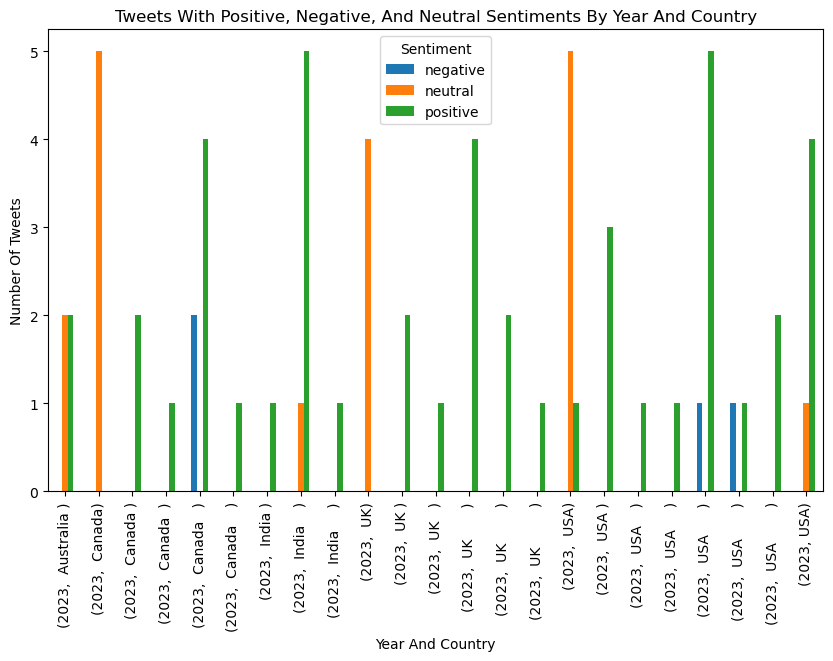

In [44]:
#10
sentiment_year_country=df[df['Sentiment'].isin(['positive', 'negative', 'neutral'])]
sentiment_grouped=sentiment_year_country.groupby(['Year', 'Country', 'Sentiment']).size().unstack()
print(sentiment_grouped)
sentiment_grouped.plot(kind='bar',figsize=(10,6))
plt.xlabel("Year And Country")
plt.ylabel("Number Of Tweets")
plt.title("Tweets With Positive, Negative, And Neutral Sentiments By Year And Country")
plt.show()